<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/Tensorflow/%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/01.%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

신경망 훈련하기 

1. 기초적인 분류 문제

In [ ]:
# 신경망을 구축해줄 프레임워크를 가져옵니다.

import tensorflow as tf
from tensorflow import keras

# 헬퍼 라이브러리를 임포트합니다.

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [ ]:
# 패션 엠니스트를 받아와서 분류를 합니다.

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# load_data함수를 호출하면 4개의 넘파이 배열이 반환됩니다. 훈련 이미지, 라벨, 테스트 이미지 라벨
# 이미지의 크기는 28 x 28 크기의 넘파이 배열이고 픽셀 값을 0~255 사이값입니다.



4423680/4422102 [==============================] - 0s 0us/step


2. 나중에 이미지 출력할 떄 사용하기 위해 별도의 변수를 만들자

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

3. 데이터 탐색

- 데이터 셋에 대해서 알아보자 (shape 등)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels # 0~9까지의 값으로 구성됨

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

4. 데이터 전처리
   - 픽셀값 범위가 0~255 사이값임 정규화 해주자
   

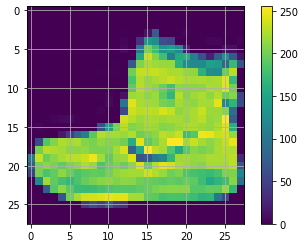

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)#격자선
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0 # 실수로 나눠주기

5. 모델 구성

층 설정

- 층은 주입된 데이터에서 표현을 추출합니다.
- 대부분의 딥러닝은 간단한 층을 연결하여 구성홥니다.

- tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다

Dense Layer는 Fully Connected Layer, 완전연결 계층이라는 개념부터 시작했다. 그렇기에 Dense Layer의 역할 또한, Input과 Output을 모두 연결해주는 것이다.

In [ ]:
model = keras.Sequential([
                          # 28, 28을 인풋으로 받고 출력으로 784 1차원으로 출력
                          keras.layers.Flatten(input_shape = (28, 28)),
                          # 필터 없이 완전연결 연산으로만 진행, 이 층들에서 가중치 학습이 일어남
                          # Densely connected 밀집 연결 or Fully connected 완전 연결 계층
                          # 128, 10개의 노드를 가짐 
                          keras.layers.Dense(128, activation = 'sigmoid'),
                          keras.layers.Dense(10, activation='softmax')

])

6. 모델 컴파일
- 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.

- 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

- 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [ ]:
# 이렇게 간단하게 설정 가능!

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

7. 모델 훈련

  1. 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.

  2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.

  3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.

In [ ]:
# model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습합니다.
# 6만개를 통째로 5번 학습하는 것

model.fit(train_images, train_labels, epochs = 5)

# 노드 갯수 128떈 0.8925
# 256땐 0.8944


# 노드 갯수가 줄면 속도 증가 늘면 느려짐
# 노드 갯수 64 일 떈 0.8860

# 층이나 노드 갯수가 증가하면 학습 속도가 느려짐
# 층을 더 깊게 했더니 정확도가 더 높아짐 0.8955

# 시그모이드로 활성화 함수를 바꾸고 이전과 동일하게 학습
# 정확도는 0.8857

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5417 - accuracy: 0.8129
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8586
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3551 - accuracy: 0.8712
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3313 - accuracy: 0.8786
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8857


8. 정확도 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\n 테스트 정확도', test_acc)

# 테스트 정확도는 0.8784 트레인 정확도는 0.8925
# 0.01 정도 테스트 정확도가 낮음, 오버피팅, 분산이 높다는 의미

# 노드 갯수를 256으로 늘리니 0.8724가 나옴 편향이 더 증가 0.12

# 층을 늘리니 테스트 정확도는 그대로 과대학습이 더 진행되는 것 같음 

# 테스트 정확도는 0.8706 0.15로 편향이 더 증가됨

313/313 - 0s - loss: 0.3562 - accuracy: 0.8706

 테스트 정확도 0.8705999851226807


9. 예측 만들기

In [ ]:
# 이제 소프트 맥스에서 나오는 출력으로 예측을 해보자

predictions = model.predict(test_images) # 테스트 이미지를 예측한 것

In [ ]:
predictions[0] # 소프트 맥스 출력 결과물

array([5.1997537e-05, 7.8256104e-09, 4.2884226e-06, 6.3880059e-08,
       1.4825445e-05, 2.7430918e-02, 4.3977230e-05, 4.7775488e-02,
       1.1987037e-04, 9.2455852e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0]) # 9번 클래스로 분류가 됨

9

In [ ]:
test_labels[0]

9

10. 시각화

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

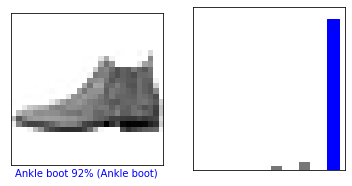

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

11. 한 개의 이미지에 대한 예측

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0)) # 3차원 배열을 출력으로 받으니 배열에 차원 추가, 행에 추가해서 0

print(img.shape)

(1, 28, 28)


In [ ]:
# 이미지 예측

predictions_single = model.predict(img) # 라벨이 없어도 됨!

print(predictions_single)

[[5.1997438e-05 7.8255802e-09 4.2884226e-06 6.3879817e-08 1.4825431e-05
  2.7430899e-02 4.3977190e-05 4.7775488e-02 1.1987049e-04 9.2455852e-01]]


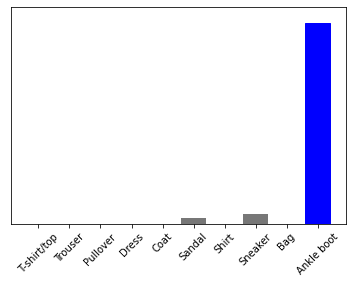

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)